In [ ]:
### %matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df = pd.read_csv('../Datasets/bank-additional/bank-full.csv', sep=';')

In [3]:
# shows the number of rowes and columns as int

df.shape

(45211, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# encode the y column as 1 and 0


df['conversion'] = df['y'].apply(lambda x: 0 if x== 'no' else 1)

In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


In [7]:
# Works out the Total conversion rate

conversion_rate = pd.DataFrame(df.groupby('conversion').count()['y']/df.shape[0] * 100.0)
conversion_rate

,y
conversion,
0,88.30152
1,11.69848


In [8]:
conversion_rate.T

conversion,0,1
y,88.30152,11.69848


In [9]:
# Works out the conversion rate by category - Job in this case

conversion_rate_by_job = df.groupby(by='job')['conversion'].sum() /df.groupby(by='job')['conversion'].count() * 100.0
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

<AxesSubplot:title={'center':'Conversion Rates by Job'}, ylabel='job'>

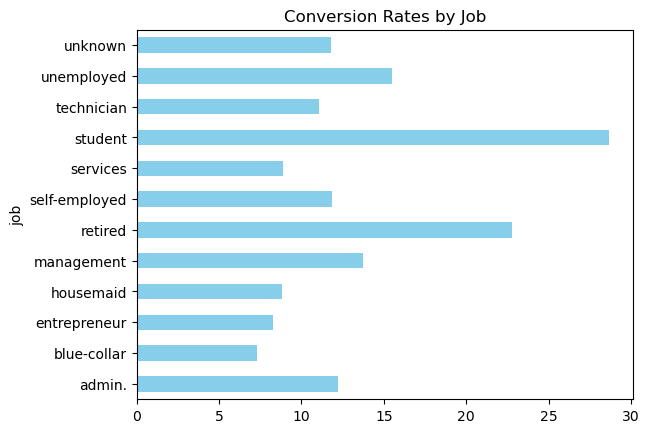

In [10]:
# Creates a horizontal bar chart

conversion_rate_by_job.plot(kind='barh', color='skyblue',title='Conversion Rates by Job')

In [11]:
# Creates pivot table and counts values 

default_by_conversion_df = pd.pivot_table(df, values='y', index='default', columns='conversion', aggfunc=len)
default_by_conversion_df

conversion,0,1
default,,
no,39159,5237
yes,763,52


array([<AxesSubplot:title={'center':'0'}, ylabel='default'>,
       <AxesSubplot:title={'center':'1'}, ylabel='default'>], dtype=object)

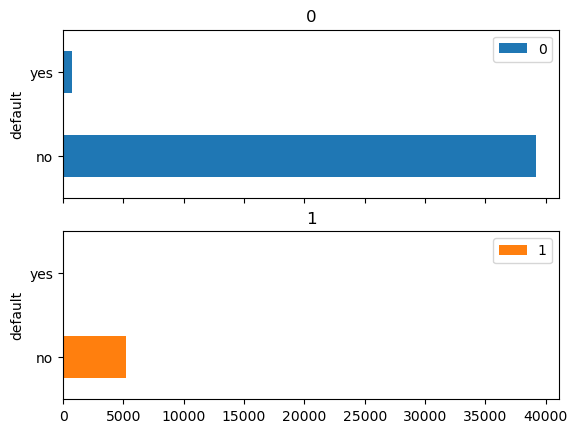

In [12]:
# Subplots seperates out multi category bar charts

default_by_conversion_df.plot(kind='barh', subplots=True)

Text(0.5, 1.0, 'Average Bank Balance Distributions by Conversion')

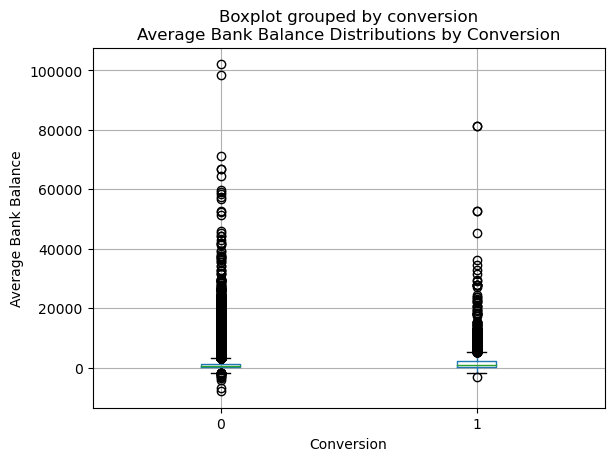

In [13]:
# Difference in distribution of bank balances with outliers

ax = df[['conversion', 'balance']].boxplot(by='conversion')
plt.xlabel('Conversion')
plt.ylabel('Average Bank Balance')
plt.title('Average Bank Balance Distributions by Conversion')

Text(0.5, 1.0, 'Average Bank Balance Distributions by Conversion')

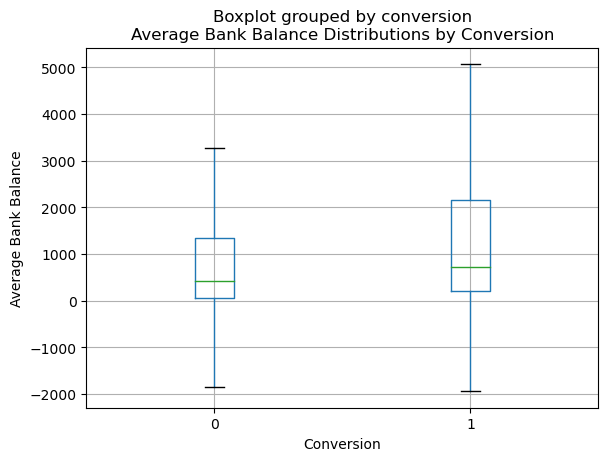

In [14]:
# Difference in distribution of bank balances with outliers

ax = df[['conversion', 'balance']].boxplot(by='conversion', showfliers=False)
plt.xlabel('Conversion')
plt.ylabel('Average Bank Balance')
plt.title('Average Bank Balance Distributions by Conversion')

In [15]:
# Looking at Marketing Fatigue in the data - checking if the count of marketing touches has an effect on conversion rate

conversion_by_num_contacts = df.groupby(by='campaign')['conversion'].sum() / df.groupby(by='campaign')['conversion'].count() * 100.0
conversion_by_num_contacts


campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
11     7.960199
12     2.580645
13     4.511278
14     4.301075
15     4.761905
16     2.531646
17     8.695652
18     0.000000
19     0.000000
20     2.325581
21     2.857143
22     0.000000
23     0.000000
24     5.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     6.250000
30     0.000000
31     0.000000
32    11.111111
33     0.000000
34     0.000000
35     0.000000
36     0.000000
37     0.000000
38     0.000000
39     0.000000
41     0.000000
43     0.000000
44     0.000000
46     0.000000
50     0.000000
51     0.000000
55     0.000000
58     0.000000
63     0.000000
Name: conversion, dtype: float64

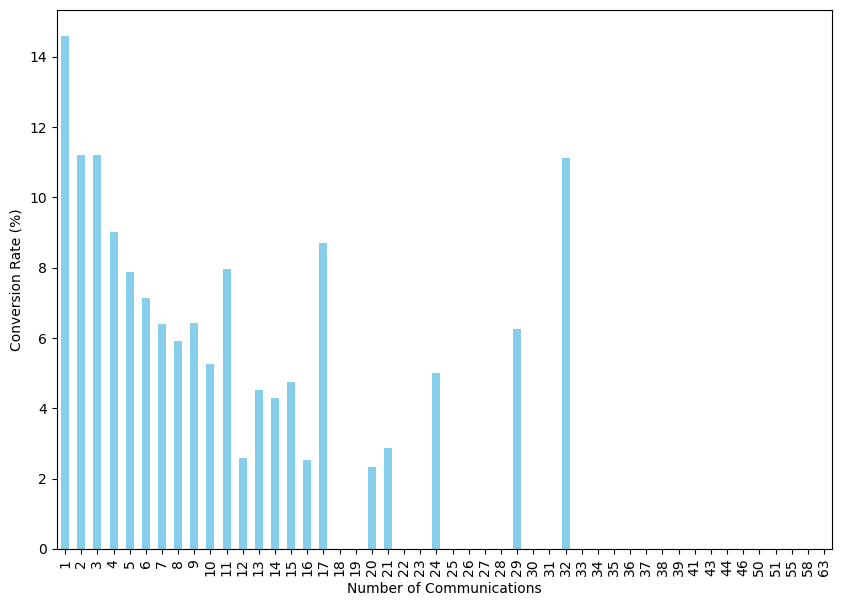

In [16]:
# plot as bar chart to see difference

ax = conversion_by_num_contacts.plot(kind='bar', figsize=(10,7), color='skyblue')
plt.xlabel('Number of Communications')
plt.ylabel('Conversion Rate (%)')

plt.show()

In [17]:
# Looks at unique values in column

df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [18]:
# encode the values of a category with a number

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['month'] = df['month'].apply(lambda x: months.index(x) +1)
df['month']



0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45211, dtype: int64

In [19]:
# now we can see how many people converted each month

df.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

In [20]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [21]:
# Encodes categorical data with 1s 
jobs_encoded_df = pd.get_dummies(df['job'])

# Renames the column by prefixing each with job_
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df]
jobs_encoded_df

In [23]:
# concatenating these encoded jobs on to the dataframe

df = pd.concat([df, jobs_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


In [24]:
marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df]
marital_encoded_df



,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45206,0,1,0
45207,1,0,0
45208,0,1,0
45209,0,1,0


In [26]:
df = pd.concat([df, marital_encoded_df], axis=1)
df['marital_divorced']

,marital_divorced,marital_divorced
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,0,0
45207,1,1
45208,0,0
45209,0,0


In [27]:
df['housing'] = df['housing'].apply(lambda x: 1 if x=='yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x=='yes' else 0)

In [56]:
# Looks at df columns names as a list

jobs_encoded_df.columns.values

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown'], dtype=object)

In [58]:
marital_encoded_df.columns.values

array(['marital_divorced', 'marital_married', 'marital_single'],
      dtype=object)

In [35]:
# sklearn package provides the decision tree model
# max_depth controls the amount the decision tree can grow

# criterion chooses between Gini and entropy 

dt_model = tree.DecisionTreeClassifier( max_depth=4)

In [79]:
features = df[['age', 'balance', 'campaign', 'previous', 'housing','job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single']]

response_var = df['conversion']


#for i in predictors:
    #features = df[['predictors']+i]
    #features = table.dropna(how='any',axis=0)

In [81]:
# trains the decision tree

dt_model.fit(features , response_var, check_input=True)

DecisionTreeClassifier(max_depth=4)

In [90]:
# Decision tree visual package


import graphviz

AttributeError: 'DataFrame' object has no attribute 'get_feature_names'

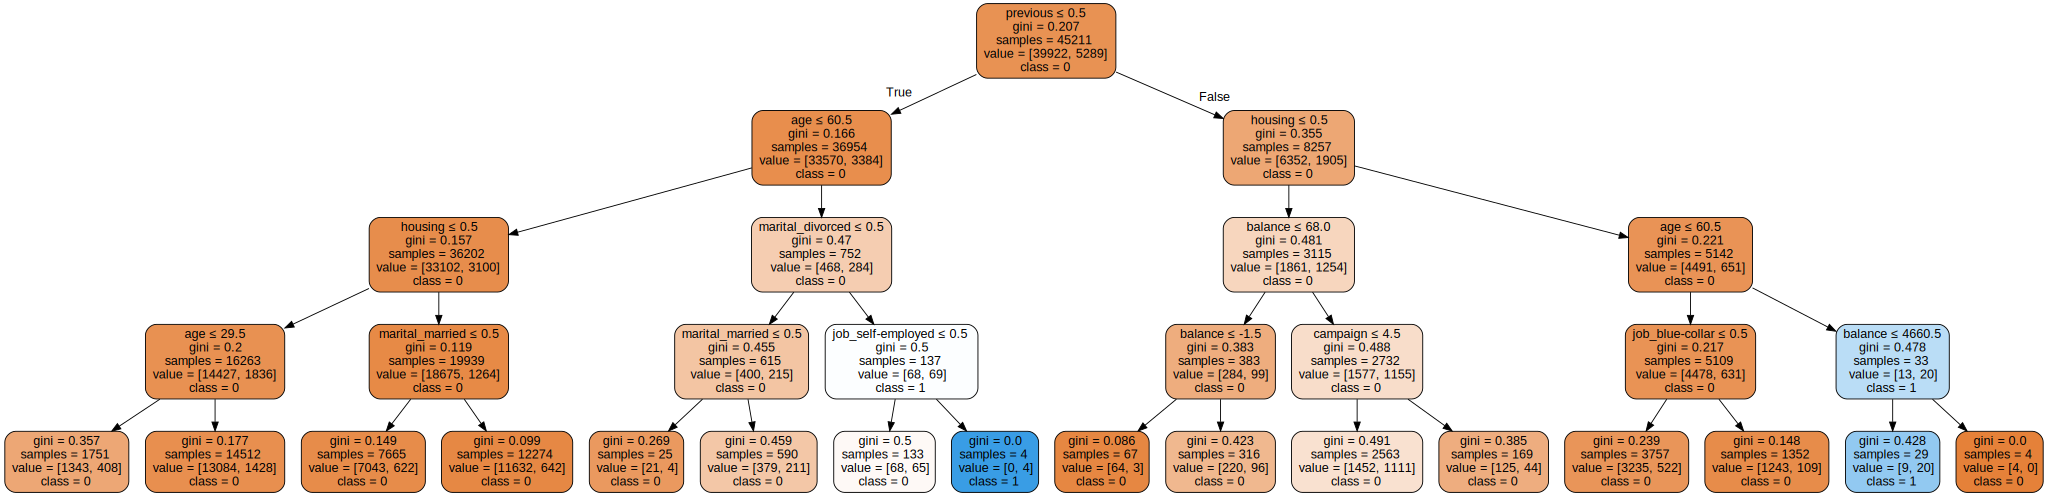

In [104]:
# visualise the decision tree


dot_data = tree.export_graphviz(dt_model, feature_names=features.columns.values, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph